# <font color='blue'>Equações Não Lineares</font>

## Solução dos Exercícios

### Material produzido por Luis Gustavo Nonato

ICMC-USP

----

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
Encontre todas as raízes da função $f(x)=x^2-\sin(x)$ utilizando o método de Newton.

x1 e x2 =  [0.         0.87672622]
[0. 0.]


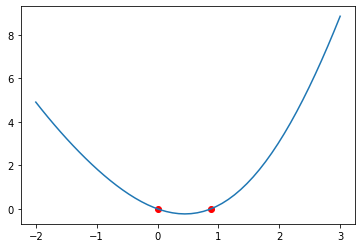

In [3]:
## Usando For
x = np.linspace(-2,3,50)
f = lambda t: t**2 - np.sin(t)
df = lambda t: 2*t - np.cos(t)
plt.plot(x,f(x))

xi = np.array([-1.0, 2.0])  #Chute inicial

for i in range(10):
    xi = xi - f(xi)/df(xi)

print('x1 e x2 = ',xi)
print(f(xi))
plt.scatter(xi,f(xi), color='red')


[0.         0.87672622]


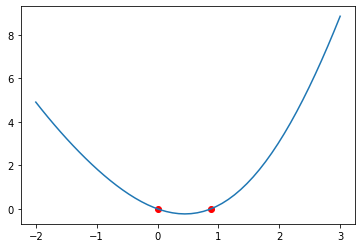

In [4]:
## Usando While

x = np.linspace(-2,3,50)
f = lambda t: t**2 - np.sin(t)
df = lambda t: 2*t - np.cos(t)
plt.plot(x,f(x))


x0 = np.array([-1.0, 2.0])
x1 = 2*np.abs(x0)
erro = np.abs(x1 - x0)

while ( np.all(erro) >= 1e-07):
    x1 = x0 - f(x0)/df(x0)
    erro = np.abs(x1 - x0)
    x0 = x1
                  
print(x0)
plt.scatter(x0,f(x0), color = 'red')
    

### Exercício 2)
Encontre a solução da equação $\sin(x)=\frac{x}{4}$. Analise como o método de Newton se comporta neste caso e tende entender geometricamente o que está acontecendo.

[-2.47457679  0.          2.47457679]
[-2.22044605e-16  0.00000000e+00  2.22044605e-16]
Note que dependendo do chute inicial o método pode não convergir, já que o método caminha em direção da equação da reta no ponto 


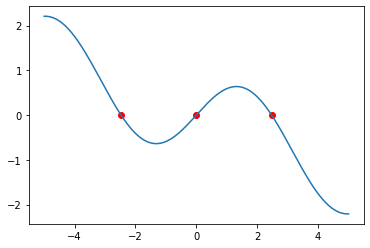

In [5]:
x = np.linspace(-5,5,200)
f = lambda t: np.sin(t) - t/4
df = lambda t: np.cos(t) - 1/4

plt.plot(x, f(x))


x0 = np.array([-2, 0.2, 2])
x1 = 2*np.abs(x0)
erro = np.abs(x1 - x0)

while ( np.all(erro) >= 1e-07):
    x1 = x0 - f(x0)/df(x0)
    erro = np.abs(x1 - x0)
    x0 = x1
                  
print(x0)
print(f(x0))
plt.scatter(x0,f(x0), color = 'red')

print('Note que dependendo do chute inicial o método pode não convergir, já que o método caminha em direção da equação da reta no ponto ')

### Exercício 3)
Encontre a solução para o seguinte sistema de equações:

$$
h_1(x,y)= x^2+xy^2 = 9\\
h_2(x,y)= 3x^2y-y^3=4
$$

Faça a representação gráfica das curvas no intervalo $x\in[-5,5]$ e $y\in[-5,5]$ e verifique visualmente se a solução encontrada está correta. Veja se consegue definir condições iniciais para atingir todas as soluções que podem ser visualizadas na representação gráfica.

In [114]:
#Usando for

t = np.linspace(-5,5,40)
h1 = lambda x,y: x**2 + x*(y**2) - 9 
h2 = lambda x,y: 3*(x**2)*y - y**3 - 4

J = lambda x,y: np.array([[2*x + y**2, 2*x*y],[6*x*y, 3*(x**2) - 3*(y**2)]])

#xi = np.array([2.0, 3.0])  #Chute inicial primeira solução
#xi = np.array([3.0, -1.0])  #Chute inicial segunda solução
#xi = np.array([1.0, -3.0])  #Chute inicial terceira solução
xi = np.array([-3.0, 0.0])  #Chute inicial terceira solução
H = np.zeros(2)

for i in range(10):
    H[:] = [h1(xi[0],xi[1]), h2(xi[0],xi[1])]
    Dx = np.linalg.solve(J(xi[0],xi[1]),-H)
    xi = xi + Dx
    
print(h1(xi[0],xi[1]),(h2(xi[0],xi[1])))

1.7763568394002505e-15 8.881784197001252e-16


In [112]:
#Usando While

t = np.linspace(-5,5,40)
h1 = lambda x,y: x**2 + x*(y**2) - 9 
h2 = lambda x,y: 3*(x**2)*y - y**3 - 4

x0 = np.array([1.0, -3.0]) #chute inicial
x1 = 2*np.abs(x0) + 1
erro = np.abs(x1 - x0)
count = 0

while ( np.all(erro) >= 1e-07):
    H[:] = [h1(x0[0],x0[1]), h2(x0[0],x0[1])]
    Dx = np.linalg.solve(J(x0[0],x0[1]),-H)
    x1 = x0 + Dx
    erro = np.abs(x1 - x0)
    x0 = x1
    count = count + 1

print(count)
print(h1(x0[0],x0[1]),(h2(x0[0],x0[1])))

6
0.0 3.552713678800501e-15


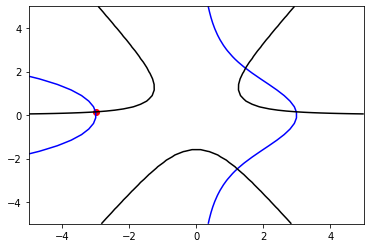

In [115]:
#Plote
xxx, yyy = np.meshgrid(np.linspace(-5,5,40),np.linspace(-5,5,40))
zz1 = h1(xxx,yyy)
zz2 = h2(xxx,yyy)

fig, ax = plt.subplots()
CS1 = ax.contour(xxx, yyy, zz1,levels = [0.0],colors='b')
CS2 = ax.contour(xxx, yyy, zz2,levels = [0.0],colors='k')
plt.scatter(xi[0],xi[1],color='red') #para o for
#plt.scatter(x0[0],x0[1],color='red') #para o while

### Exercício 4)
Utilize o método de Newton e Quase-Newton para encontrar o ponto de mínimo da função:

$$
f(x,y)=(y-x^2)^2+(1-x)^2
$$

Compare a velocidade de convergência dos dois métodos.

In [31]:
#Método de Newton

#t = np.linspace(-5,5,40)
h1 = lambda x,y: -4*x*(y-x**2) - 2*(1-x) 
h2 = lambda x,y: 2*(y-x**2)

J = lambda x,y: np.array([[-4*y + 12*x**2 + 2, -4*x],[-4*x, 2]])

xi = np.array([-2, 3])  #Chute inicial terceira solução
H = np.zeros(2)
eps = 1e-7
for i in range(100):
    H[:] = [h1(xi[0],xi[1]), h2(xi[0],xi[1])]
    Dx = np.linalg.solve(J(xi[0],xi[1]),-H)
    if (np.linalg.norm(Dx) < eps):
        print('Convergiu em',i,'passos')
        break
    xi = xi + Dx
    
print(h1(xi[0],xi[1]),(h2(xi[0],xi[1])))

Convergiu em 8 passos
-1.3045193865290347e-09 -1.3071543847331668e-09


In [30]:
#Método de Quase-Newton

h1 = lambda x,y: -4*x*(y-x**2) - 2*(1-x) 
h2 = lambda x,y: 2*(y-x**2)

xk = np.array([-2, 3])  #Chute inicial terceira solução
Hk = np.array([h1(xk[0],xk[1]),h2(xk[0],xk[1])])
Bk = np.identity(2)
eps = 1e-7

for i in range(100):
    Dx = np.linalg.solve(Bk,-Hk)
    if (np.linalg.norm(Dx) < eps):
        print('Convergiu em',i,'passos')
        break
    xk = xk + Dx
    Hk1 = np.array([h1(xk[0],xk[1]),h2(xk[0],xk[1])])
    yk = Hk1 - Hk 
    sk = Dx
    Bk = Bk + ((yk - np.dot(Bk,sk)).reshape(-1,1)*sk)/np.dot(sk,sk)
    Hk = Hk1

print(xk,[h1(xk[0],xk[1]),h2(xk[0],xk[1])])

Convergiu em 54 passos
[1. 1.] [-2.8950108975696625e-10, 7.325628992305155e-11]


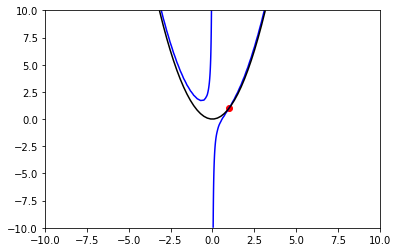

In [32]:
#Plote
xxx, yyy = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
zz1 = h1(xxx,yyy)
zz2 = h2(xxx,yyy)

fig, ax = plt.subplots()
CS1 = ax.contour(xxx, yyy, zz1,levels = [0.0],colors='b')
CS2 = ax.contour(xxx, yyy, zz2,levels = [0.0],colors='k')
plt.scatter(xi[0],xi[1],color='red') #para o for
#plt.scatter(x0[0],x0[1],color='red') #para o while

### Exercício 5)
Utilize os multiplicadores de Lagrange para determinar todos os pontos que sejam solução de 

$$\min x^2y \quad \mbox{sujeito a } \\ x^2+2y^2=6$$

In [5]:
h1 = lambda v: 2*v[0]*v[1] - 2*v[2]*v[0]
h2 = lambda v: v[0]**2 - 4*v[2]*v[1]
h3 = lambda v: v[0]**2 + 2*v[1]**2 - 6

J = lambda v: np.array([[2*v[1] - 2*v[2], 2*v[0], -2*v[0]],
                        [2*v[0], -4*v[2], -4*v[1]],
                        [2*v[0], 4*v[1], 0]])

f = lambda x: x[0]**2*x[1]

def Newton_exe1(X_0):
    n = 100
    X = np.array(X_0)  # condição inicial, X[0] = x, X[1] = y, X[2] = lambda
    H = np.zeros(3)
    for i in range(1,n):
        H[:] = [h1(X),h2(X),h3(X)]
        dx = np.linalg.solve(J(X),-1*H)
        X = X+dx
    
    return(X)
    
xi = Newton_exe1(np.array([-2.1,1.1,1]))
np.set_printoptions(precision=2)
if (np.all(np.abs([h1(xi),h2(xi),h3(xi)])<1e-7)):
    print('A solução é:',xi[:2])
    print('Que esta na curva de nível',xi[0]**2+3*xi[0]*xi[1]**3+xi[1]**2)
    print('O valor de lambda é',xi[2])
else:
    print('Solução Não convergiu !!')

A solução é: [-2.  1.]
Que esta na curva de nível -1.0
O valor de lambda é 1.0


Text(0.5, 1.0, 'curvas de nivel')

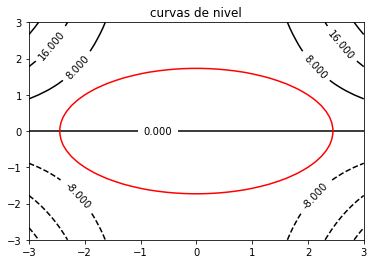

In [7]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k')
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

[-2.  1.] 4.0
[ 2. -1.] -4.0
[2. 1.] 4.0
[ 0.   -1.73] -0.0
[ 0.   -1.73] -0.0
[ 0.   -1.73] -0.0


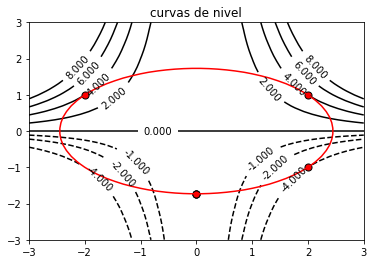

In [6]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-4,-2,-1,0,2,4,6,8])
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

np.set_printoptions(precision=2)

#X0 = np.array([[-2,1,1],[-2,-2,1],[2,2,1],[0,2,1],[-2,-1.001,1],[-2,-1.01,1]])
X0 = np.array([[-2.1,1.1,1],[-0.1,1.1,1],[2.1,1.1,1],[1.95,-1.1,1],[0.1,-2.1,1],[-1.95,-1.1,1]])

for i in range(X0.shape[0]):
    S = Newton_exe1(X0[i])
    print(S[:2],f(S))
    plt.scatter(S[0],S[1],color='red',s=50, edgecolors= "black")

**OBS**: Note que os pontos $(-2,1)$ e $(2,1)$ satisfazem a restrição, mas o método de Newton não consegue encontrá-los. A razão é que a Jacobiana é singular nestes dois pontos, logo, o método de Newton não pode ser aplicado para encontrá-los !!

## Exercício 6)
Repita o exercício anterior utilizando o método Quase-Newton. Utilizando condições iniciais apropriadas, veja se consegue encontrar todas as soluções. 

In [7]:
def Quase_Newton_exe1(X0):
    Bk = np.identity(3)
    xk = np.array(X0)
    Hk = np.array([h1(xk),h2(xk),h3(xk)])
    for i in range(100):    
        Dx = np.linalg.solve(Bk,-1.0*Hk)    
        if (np.linalg.norm(Dx) < 1e-7):
            break
        xk = xk + Dx                      
        Hk1 = np.array([h1(xk),h2(xk),h3(xk)])
        yk = Hk1 - Hk          
        sk = Dx           
        Bk = Bk + ((yk-np.dot(Bk,sk)).reshape(-1,1)*sk)/np.dot(sk,sk)     
        Hk = Hk1
    if (i==100):
        print('Não convergiu')
    return(xk)

[-2.  1.] 3.999999693248237
[6.45e-09 1.73e+00] 7.214254356775494e-17
[2. 1.] 3.999999693248237
[ 2. -1.] -4.000000154522889
[-8.58e-09 -1.73e+00] -1.2737975051237761e-16
[-2. -1.] -4.000000154522889


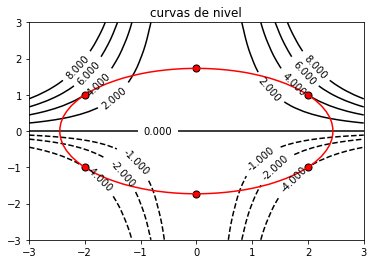

In [9]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-4,-2,-1,0,2,4,6,8])
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

np.set_printoptions(precision=2)

X0 = np.array([[-2.1,1.1,1],[-0.1,1.1,1],[2.1,1.1,1],[1.95,-1.1,1],
               [0.1,-2.1,1],[-1.95,-1.1,1]])

for i in range(X0.shape[0]):
    S = Quase_Newton_exe1(X0[i])
    print(S[:2],f(S))
    plt.scatter(S[0],S[1],color='red',s=50, edgecolors= "black")

### Exercício 7) 

Encontre o ponto da parábola $y=x^2$ que está mais próximo do ponto $(3,1)$.

**Solução**

O problema consistem em resolver:

$$
\min\, (x-3)^2+(y-1)^2,\quad \mbox{sujeito a}\\
x^2-y=0
$$

O multiplicador de Lagrange nos dá o sistema de equações

$$
2(x-3) -2\lambda x = 0\\
2(y-1)+\lambda = 0\\
x^2-y=0
$$

sendo a Jacobiana 

$$
J = \begin{bmatrix}
2(1-\lambda) & 0 & -2x\\
0 & 2 & 1\\
2x & -1 & 0
\end{bmatrix}
$$

In [4]:
h1 = lambda X: 2*(X[0]-3) -2*X[0]*X[2]
h2 = lambda X: 2*(X[1]-1)+X[2]
h3 = lambda X:  X[0]**2 -X[1]

def Newton_exe7(X_0):
    n = 20
    X = np.array(X_0)  # condição inicial
    H = np.zeros(3)
    for i in range(n):
        H[:] = [h1(X), h2(X), h3(X)]
        J = np.asarray([[2*(1-X[2]),0,-2*X[0]],
                        [0,2,1],
                        [2*X[0], -1, 0]])
        dx = np.linalg.solve(J,-1*H)
        X = X+dx
    
    return(X)

O ponto mais próximo de (3,1) é [1.2896239  1.66312981]


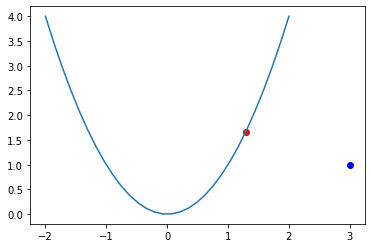

In [5]:
S = Newton_exe7([2,1,1])

t = np.linspace(-2,2,30)
plt.plot(t,t**2)
plt.scatter(3,1,color='blue')
plt.scatter(S[0],S[1],color='red')

print('O ponto mais próximo de (3,1) é',S[:2])

### Exercício 8)

Determine a curva de nível de $f(x,y)=x^2+16y^2$ que seja tangente à curva $xy=1$, $x>0$ e $y>0$. Qual o ponto de tangência?

**Solução**

Sabemos que os pontos onde as curvas de nível de $f(x,y)$ são tangentes a curva $g(x,y)=0$ satisfazem a condição:

$$
\nabla f = \lambda\nabla g
$$

que é a condição utilizada pelos multiplicadores de Lagrange. Desta forma podemos aplicar multiplicadores de Lagrange para encontrar os pontos críticos de 

$$
F(x,y,\lambda) = f(x,y)+\lambda g(x,y)
$$

que serão os pontos de tangência.

In [12]:
h1 = lambda x: 2*x[0] - x[2]*x[1]
h2 = lambda x: 32*x[1] - x[2]*x[0]
h3 = lambda x: x[0]*x[1] - 1

f = lambda x: x[0]**2 + 16*x[1]**2

J = lambda x: np.array([[2,-x[2],-x[1]],[-x[2],32,-x[0]],[x[1],x[0],0]])

def Newton_exe8(X_0):
    n = 100
    X = np.array(X_0)  # condição inicial, X[0] = x, X[1] = y, 
#X[2] = lambda
    H = np.zeros(3)
    for i in range(1,n):
        H[:] = [h1(X),h2(X),h3(X)]
        dx = np.linalg.solve(J(X),-1*H)
        X = X+dx
    
    return(X)

<a list of 3 text.Text objects>

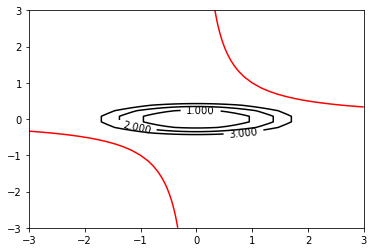

In [13]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2 + 16*yy**2

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-1,0,1,2,3])
CS2 = ax.contour(xx, yy, xx*yy-1,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)

In [14]:
# teremos duas soluções, porém somente uma no quadrante positivo x>0, y>0

s = Newton_exe8([2,1,1])

print('A curva de nível é',f(s))
print('O ponto de tangência no quadrante positivo é',s[:2])

A curva de nível é 8.0
O ponto de tangência no quadrante positivo é [2.  0.5]


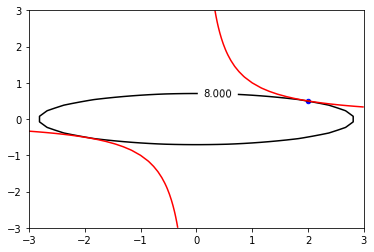

In [15]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2 + 16*yy**2

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[8])
CS2 = ax.contour(xx, yy, xx*yy-1,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)

plt.scatter(s[0],s[1],s=20,color='b')

### Exercício 9)
Encontre os pontos da curva $x^2−6xy−7y^2+80=0$ mais próximos da origem. Desenhe a curva.

In [16]:
h1 = lambda X: 2*X[0] - X[2]*(2*X[0]-6*X[1])
h2 = lambda X: 2*X[1] - X[2]*(-6*X[0]-14*X[1])
h3 = lambda X: -X[0]**2 + 6*X[0]*X[1] +7*X[1]**2 - 80

J = lambda X: np.array([[2-2*X[2], 6*X[2], -2*X[0] + 6*X[1]],
                        [6*X[2], 2+14*X[2], 6*X[0] + 14*X[1]],
                        [-2*X[0]+6*X[1], 6*X[0] + 14*X[1], 0]])

def Newton_exe9(X_0):
    n = 100
    X = np.array(X_0)  # condição inicial
    H = np.zeros(3)
    for i in range(n):
        H[:] = [h1(X), h2(X), h3(X)]
        dx = np.linalg.solve(J(X),-1*H)
        X = X+dx
    
    return(X)

In [17]:
p1 = Newton_exe9([1,1,1])
print(p1)

p2 = Newton_exe9([-1,-1,1])
print(p2)

[ 1.    3.   -0.12]
[-1.   -3.   -0.12]


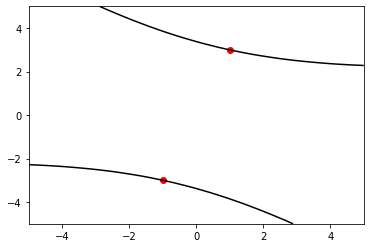

In [18]:
xx, yy = np.meshgrid(np.linspace(-5,5,40), np.linspace(-5,5,40))
zz = xx**2 - 6*xx*yy - 7*yy**2 + 80

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[0])

plt.scatter(p1[0],p1[1],color='red')
plt.scatter(p2[0],p2[1],color='red')

### Exercício 10)
O pacote <font color='blue'> optimize </font> do <font color='blue'> scipy </font> possui uma função <font color='blue'> fsolve </font> que implementa um método para encontrar a raiz de um sistema de equações não lineares. O código abaixo fornece um exemplo da função para encontrar a solução de:

$$
x^2 + y^2 - 4 = 0\\
x^2−6xy−7y^2+80 = 0
$$

In [19]:
# exemplo do método fsolve
from scipy.optimize import fsolve

f = lambda x: [x[0]**2+x[1]**2-4, x[0]**2-6*x[0]*x[1]-7*x[1]**2+80]

s = fsolve(f,[1,2])  # o parâmetro [1,2] é a condição inicial

print(s)

[0.99 2.99]


C:\Users\Guilherme\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Compare o resultado da função <font color='blue'> fsolve </font> com os resultados obtidos nos exercícios 5) e 6).

**Solução**

O sistema a ser resolvido no exercício 5) é 

$$
2xy-2\lambda x = 0\\
x^2-4\lambda y = 0\\
x^2+2y^2-6 = 0
$$

[-2.  1.] [0.999999999999944, 89.00000000000034]
[-2.  1.] [1.0000000000005773, 89.00000000000121]
[2. 1.] [0.999999999999944, 65.00000000000176]
[ 2. -1.] [1.0000000000008935, 89.00000000000553]
[-8.13e-13 -1.73e+00] [-1.0000000000031317, 59.00000000001347]
[-2. -1.] [1.0000000000008935, 65.00000000001133]


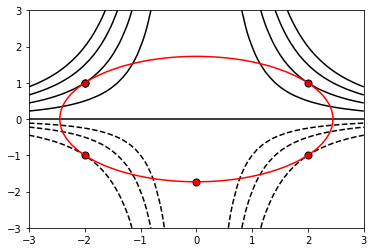

In [20]:
fexe5 = lambda x: [2*x[0]*x[1] - 2*x[0]*x[2], x[0]**2 - 4*x[1]*x[2], x[0]**2 + 2*x[1]**2 -6]

xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-4,-2,-1,0,2,4,6,8])
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])

X0 = np.array([[-2.1,1.1,1],[-0.1,1.1,1],[2.1,1.1,1],[1.95,-1.1,1],[0.1,-2.1,1],[-1.95,-1.1,1]])

for i in range(X0.shape[0]):
    S = fsolve(fexe5,X0[i])
    print(S[:2],f(S))
    plt.scatter(S[0],S[1],color='red',s=50, edgecolors= "black")
    

Note que o fsolve não foi capaz de encontrar uma das soluções, enquanto que com as mesmas condições iniciais o método Quase-Newton encontrou todas.